# Explore here

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

AVISO: se nos permitio ser radicales y solo elijo agrupar los valores de quality en 2 grupos.

In [ ]:
# Read
df = pd.read_csv('../data/raw/winequality-red.csv', sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


La columna quality tiene de 3 a 8 calidades de vino, en la columna "label" como sugiere el ejercicio en la cual hay 3 categorias.

In [ ]:
# describe
df.describe

<bound method NDFrame.describe of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.0

Cada fila es un vino con sus caracteristicas quimicas,  calidad del vino muestra 3,5,6 y 8 borraremos los duplicados.

In [55]:
# Quitamos duplicados.
df = df.drop_duplicates()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_group
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0


In [54]:
# Hacemos 2 grupos de claidad 0 y 1
df["quality_group"] = df["quality"].apply(lambda x: 0 if x <= 5 else 1)
df[["quality", "quality_group"]].value_counts()

quality  quality_group
5        0                681
6        1                638
7        1                199
4        0                 53
8        1                 18
3        0                 10
Name: count, dtype: int64

Creamos nueva columna "quality_group", 0 = baja calidad(vinos con "quality" de 5 o menos), 1= alta calidad(vinos con "quality" mayor a 5)

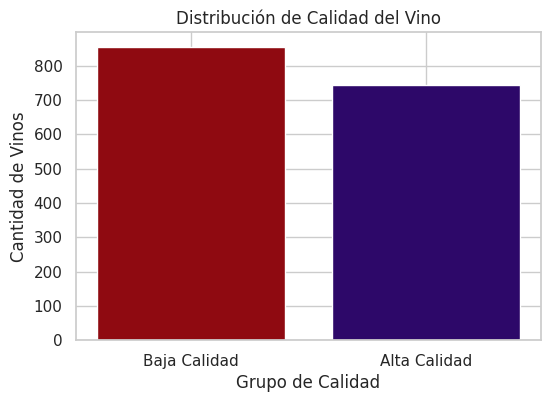

In [53]:
# conteo de vinos en cada grupo de calidad
quality_counts = df["quality_group"].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(["Baja Calidad", "Alta Calidad"], quality_counts, color=["#8F0A11", "#2D0869"])
plt.xlabel("Grupo de Calidad")
plt.ylabel("Cantidad de Vinos")
plt.title("Distribución de Calidad del Vino")
plt.show()

In [52]:
# Separar variables independientes (X) y objetivo (y)
X = df.drop(["quality","quality_group"], axis=1)
y = df["quality"]

# Dividir en conjuntos de entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# Escalar los datos usando StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Media después del escalado:", X_train_scaled.mean(axis=0))
print("----------------------------------------------------")
print("Desviación estándar después del escalado:", X_train_scaled.std(axis=0))

Media después del escalado: [ 3.57886061e-16 -1.14392805e-16 -4.57571219e-17 -2.61469268e-17
  8.33433292e-17 -1.47076463e-17  1.30734634e-17 -9.97505257e-15
 -3.01997005e-15 -4.11814097e-16 -8.87361328e-16]
----------------------------------------------------
Desviación estándar después del escalado: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


transformamos cada columna para que tenga media=0 o Desviacion estandar=1 asi todas las variables tienen la misma influencia en el modelo.

In [50]:
# Entrenar KNN con un valor inicial de k=5
k_initial = 5
model = KNeighborsClassifier(n_neighbors=k_initial, algorithm="brute")
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print(f"Accuracy con k={k_initial}: {accuracy_score(y_test, y_pred):.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy con k=5: 0.5441

Confusion Matrix:
 [[ 0  1  3  0  0  0]
 [ 0  0  7  4  0  0]
 [ 0  2 82 33  3  0]
 [ 0  1 40 52 10  0]
 [ 0  0  7 10 14  0]
 [ 0  0  0  1  2  0]]


Precision: el modelo acierta un 54.41% de los casos.
Matriz : cada fila valores reales, cada columna valores predichos. predijo 82 vinos correctamente y 40 mal.
Vinos de calidad 3 y 4 se confunden mucho con calidad 5 y 6. seguramente porque solo hice 2 grupos.

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        11
           5       0.64      0.74      0.69       120
           6       0.55      0.59      0.57       103
           7       0.65      0.48      0.56        31
           8       0.00      0.00      0.00         3

    accuracy                           0.61       272
   macro avg       0.31      0.30      0.30       272
weighted avg       0.57      0.61      0.58       272



/home/vscode/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/vscode/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/vscode/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


El modelo acierta un 61% de los casos.

In [48]:
# Optimización de k (de 1 a 20)
k_values = range(1, 21)
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k, algorithm="brute")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred))

print(accuracies)

[0.5367647058823529, 0.5257352941176471, 0.4963235294117647, 0.5147058823529411, 0.5441176470588235, 0.5845588235294118, 0.5772058823529411, 0.5698529411764706, 0.6066176470588235, 0.5992647058823529, 0.6286764705882353, 0.6139705882352942, 0.6102941176470589, 0.6029411764705882, 0.5919117647058824, 0.5772058823529411, 0.5955882352941176, 0.6102941176470589, 0.6102941176470589, 0.6066176470588235]


Aqui probamos diferentes valores de k de 1 a 20 y evalua la precision para cada uno, la mayor precision seria k=11 con un 0,6287 osea un 62,87% y la peor k=3 con 49,63%.

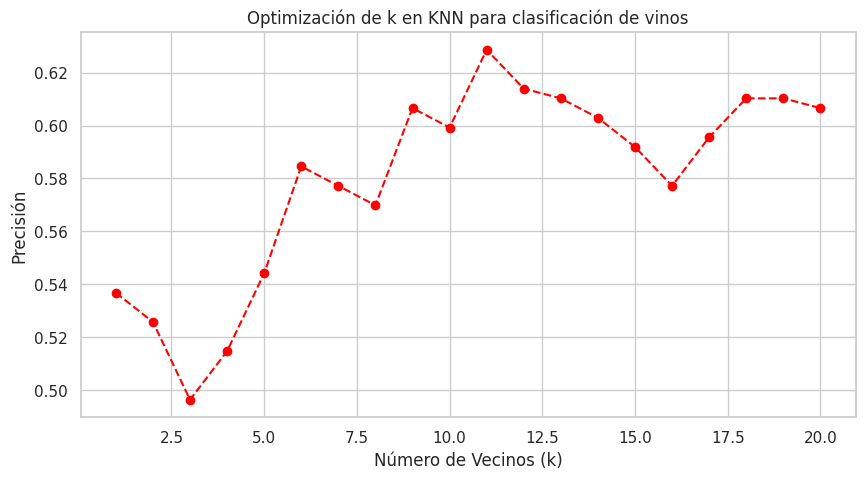

In [47]:
# Accuracy vs k
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='dashed', color='red')
plt.xlabel("Número de Vecinos (k)")
plt.ylabel("Precisión")
plt.title("Optimización de k en KNN para clasificación de vinos")
plt.show()